Author: Aastha Chachra
Purpose: Assignment week 01
Class: ALY 6015 

Import all libraries

In [0]:
import numpy as np 
import pandas as pd 
import os
import io
import matplotlib.pyplot as pl
import matplotlib.ticker as ti
%matplotlib inline
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder
sns.set(color_codes=True) 



Introducing the insurance dataset

Reading the csv

In [0]:
data_path = "https://drive.google.com/file/d/1qykQtpKMm_BBNOYpnAjtPEIdrJoT4WmZ/view?usp=sharing"
in_df = pd.read_csv(data_path, sep='\t', comment='#')

Size of file

In [57]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name =fn, length=len(uploaded[fn])))

User uploaded file "insurance.csv" with length 55628 bytes


In [58]:
uploaded

{'insurance.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,southwe

Acquire the data

In [0]:
in_df = pd.read_csv(io.StringIO(uploaded['insurance.csv'].decode('utf-8')))

In [60]:
in_df.head() #Display the first five dataset values

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Set Information:
We will explore a data set dedicated to the cost of treatment of different patients.  The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We do not have data on the diagonsis, however with the other information we can predict the health of the patient

# Features description:
1. age: Primary beneficiary 
2. sex: Gender of insurance contractor (male, female) 
3. bmi: Body mass index for an understanding of body whether it is high or low relative to height, objective index of body weight in kg/m^2 using the ratio of height to weight. Ideal values 18.5 to 24.9. 
4. children: Number of children covered by health insurance (number of dependents) 
5. smoker (yes/no) 
6. region: The beneficiary’s residential area in the US, northwest, southwest, northeast, southeast. 
7. charges: Medical costs billed by health insurance for the individual.

# Steps we will perform under EDA are:


1. Find the shape of the data
2. Data types of individual columns
2. Check for missing values
3. Descriptive stats of numerical columns
4. Find the distribution of numerical columns and the asssociated skeweness and presence of outliers
5. Distribution of categorical columns









In [61]:
in_df.shape #The data has 1338 instances with 7 attributes

(1338, 7)

2. Datatypes information

In [62]:
in_df.dtypes #7 attributes: 2 integer type, 2 float type and 3 object type(Strings in the column)


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Checking for NULLS

In [63]:
in_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Observation - We have no nulls in the dataset.
Let us identify the variables. 
1.   Categorical variables include - sex, smoker and region. 
2.   Numerical variables are - age, bmi, children and charges

 Target value is charges and the rest 06 features can be assumed as the predictor variables.





In [64]:
in_df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

Charges are highly skewed

In [0]:
categorical_features = ['sex','region','smoker']
numerical_features = ['age','bmi','children'] 

In [66]:
in_df[categorical_features].describe().round().T


,count,unique,top,freq
sex,1338,2,male,676
region,1338,4,southeast,364
smoker,1338,2,no,1064


In [67]:
in_df[numerical_features].describe().round().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.0,14.0,18.0,27.0,39.0,51.0,64.0
bmi,1338.0,31.0,6.0,16.0,26.0,30.0,35.0,53.0
children,1338.0,1.0,1.0,0.0,0.0,1.0,2.0,5.0


* Data looks legit as all the statistics seem reasonable
* Looking at the age column, data looks representative of the true age distribution of the adult population
* Very few people have more than 2 children. 75% of the people have 2 or less children


In [68]:
in_df['charges'].value_counts()

1639.56310     2
8825.08600     1
43254.41795    1
5257.50795     1
1980.07000     1
              ..
12269.68865    1
6360.99360     1
7371.77200     1
16420.49455    1
34254.05335    1
Name: charges, Length: 1337, dtype: int64

We just took out the unique values from the charges column using the value count function
Lets filter out the dataset by a condition sex = female and we observe there are 662 females out of 1338 patients

In [69]:
in_df[(in_df['sex'] == "female")]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


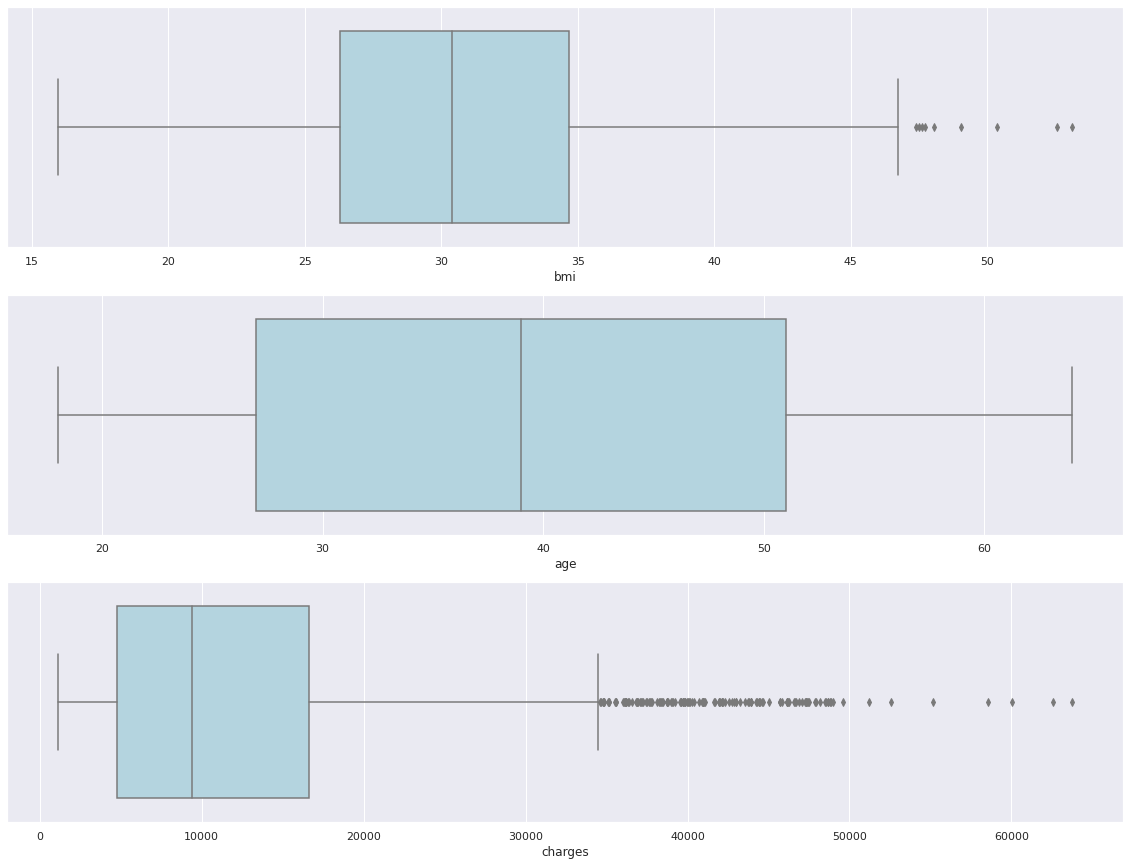

In [70]:
#checking for outliers
pl.figure(figsize= (20,15))
pl.subplot(3,1,1)
sns.boxplot(x= in_df.bmi, color='lightblue')

pl.subplot(3,1,2)
sns.boxplot(x= in_df.age, color='lightblue')

pl.subplot(3,1,3)
sns.boxplot(x= in_df.charges, color='lightblue')

pl.show()

*   BMI has few extreme values
*   charges is highly skewed and has many extreme values



#Visualizations
To have a better understanding of the values within these features, visualization helps. So, plotting the data points on a graph with the help of a visualization library will let us know the distribution of the data points. Seaborn and Matplotlib are great such libraries for it.

In [0]:
#Plots to see the distribution of the continuous features individually


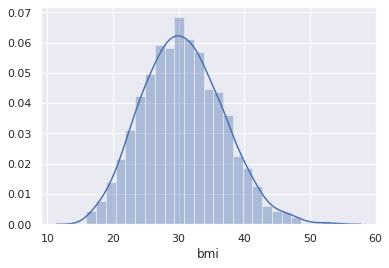

In [71]:
sns.distplot(in_df['bmi'])

The plot is a uniform distribution of values in bmi feature, all the values for mean, median and mode are close to each other.

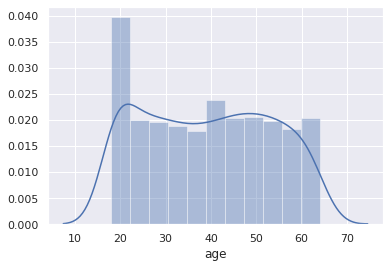

In [72]:
sns.distplot(in_df['age']) 


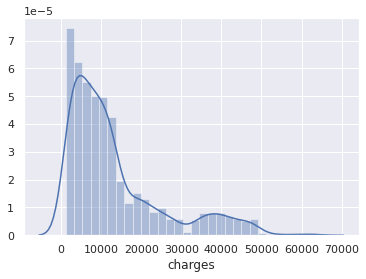

In [73]:
sns.distplot(in_df['charges'])

We see that age is not uniformily distributed. As you can see the ‘charges’ plot is right-skewed (long tail on the right) it has its mean greater than its median. The other similar feature ‘children’ is also numeric in nature but as it has only a few unique values defined, it is better to treat it as categorical and plot a stripplot() than the distplot().

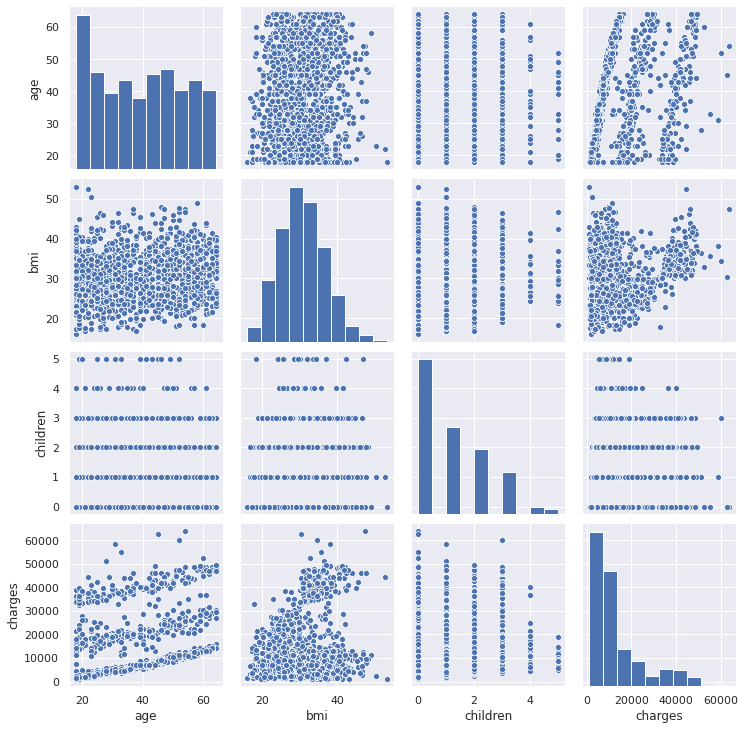

In [74]:
sns.pairplot(in_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]) #bivariate plot is introduced between each pair and since pairplot ignores strings using numeric features only


# Inferences


* The plot between ‘age’ and ‘bmi’ does not indicate any relationship between them. The plot is more like a cloud and lacks direction
* Between ‘age’ and ‘charges’, there is no clear relationship, though there seem to be 3 lines of positive relationship between them. It means, there are 3 sets of charges which increase gradually with age or could be because for the same ailment, older people are charged more than the younger ones
* No clear relation between ‘age’ and ‘children’ either
* The range of ‘bmi’ decreases as children increases, however there 
are some extreme values in ‘bmi’ for children value 5. 
* There is a little positive relation between ‘bmi’ and ‘charges’, although the plot is a cloud on initial values of ‘charges’. 
* The range of ‘charges’ decreases as the value of ‘children’ increases.







In [0]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
import copy
in_df_encoded = copy.deepcopy(in_df)
in_df_encoded.loc[:,['sex', 'smoker', 'region']] = in_df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

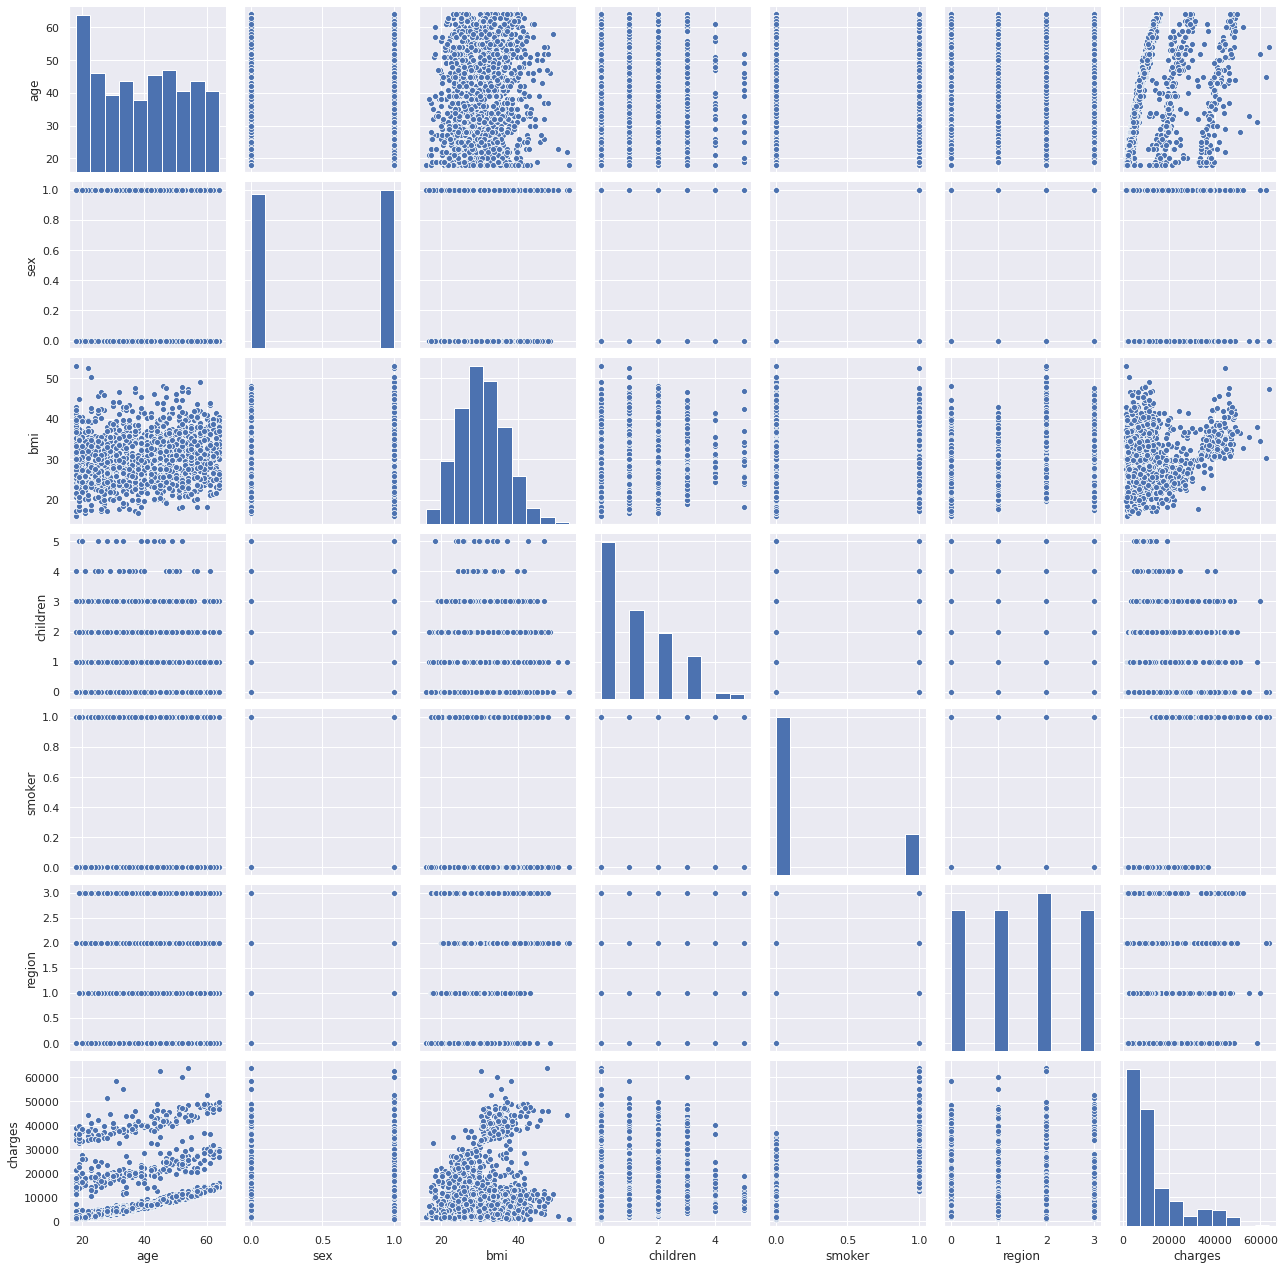

In [76]:
sns.pairplot(in_df_encoded)  #pairplot


* The only obvious correlation of 'charges' is with 'smoker'
* Looks like smokers claimed more money than non-smokers



Correlation between smoker and charges through one more plot example - heatmap

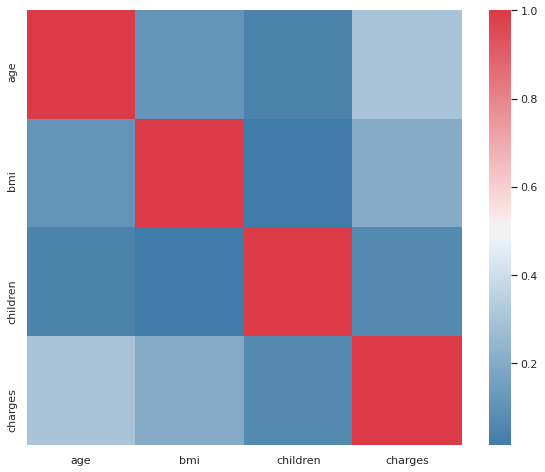

In [77]:
f, ax = pl.subplots(figsize=(10, 8))
corr = in_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

#A strong correlation is found with smoking and charges
Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages


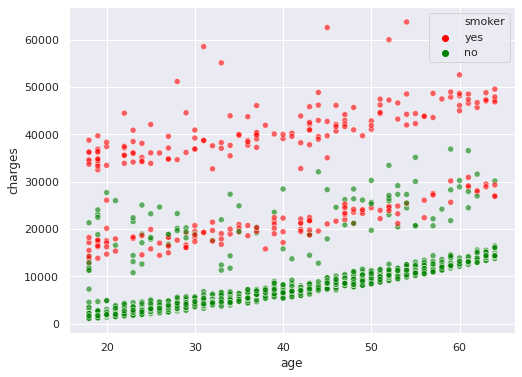

In [78]:
pl.figure(figsize=(8,6))
sns.scatterplot(in_df.age, in_df.charges,hue=in_df.smoker,palette= ['red','green'] ,alpha=0.6)
pl.show()


Visually the difference between charges of smokers and charges of non-smokers is apparent

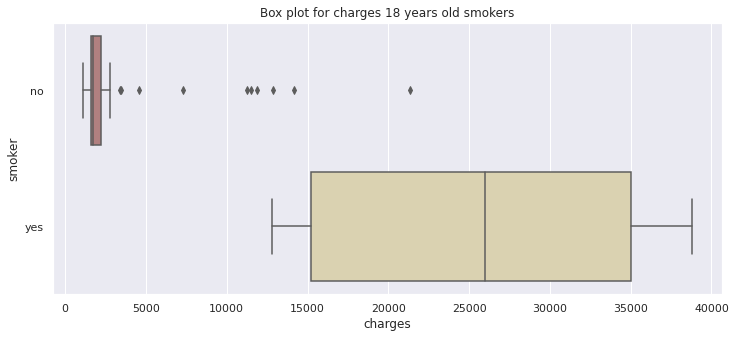

In [48]:
#less than 18 years of age 
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = in_df[(in_df.age == 18)] , orient="h", palette = 'pink')

In [79]:
Is the proportion of smokers significantly different in different genders?


Object `genders` not found.


In [29]:
print("Total count of smokers is ", in_df[in_df['smoker']=='yes'].shape[0]) 
print("Total count of male smokers is ", in_df[in_df['smoker']=='yes'][in_df['sex']=='male'].shape[0]) 
print("Total count of female smokers is ", in_df[in_df['smoker']=='yes'][in_df['sex']=='female'].shape[0]) 
print("Proportion of smokers who are male is ", (in_df[in_df['smoker']=='yes'][in_df['sex']=='male'].shape[0])/in_df[in_df['smoker']=='yes'].shape[0]) 
print("Proportion of smokers who are female is ", (in_df[in_df['smoker']=='yes'][in_df['sex']=='female'].shape[0])/in_df[in_df['smoker']=='yes'].shape[0])

Total count of smokers is  274
Total count of male smokers is  159
Total count of female smokers is  115
Proportion of smokers who are male is  0.5802919708029197
Proportion of smokers who are female is  0.4197080291970803


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


The proportions being 58% and 42% for male and female genders who smoke are not significantly different.


Women are coded with the symbol " 1 "and men - "0". Male smokers are more than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking

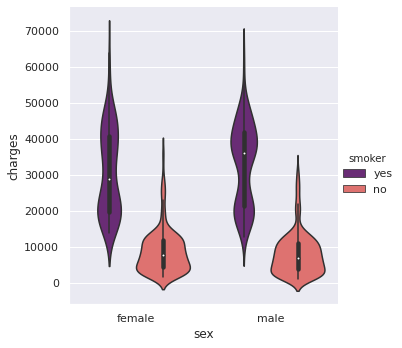

In [80]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=in_df, palette = 'magma')

#What follow-up analyses might you be able to execute?

1. Through distributions proof that the charges for smokers and non-smokers are not the same or if bmi varies as per gender and if smoking habits of males and females differ 
2. Predict the cost of treatment of patients 

#How would you do it?

*   Through T-distribution by calculating the p value and if p value comes  < 0.05 it has an effect (setting the level of significance at 5%)
*   Linear Regression

#What would you do with the results?

*   Understand/interpret them
*   Analyze them to predict and take business decisions



#Conclusion

The only possible correlation is between ‘charges’ and ‘smoker’. Smokers claimed more money than non-smokers.
People who smoke have high charges and the people who do not smoke have considerably very low charges.

The proportions being 58% and 42% for male and female genders who smoke are not significantly different.

Also we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking.

We have patients under 20 in our data set. This is the minimum age of patients in our set. The maximum age is 64 years

There is a relationship between age and charges, as you get old you spend more on healthcare could be the justification for the same.

As we can see, even at the age of 18 smokers spend much more on treatment than non-smokers. 